# Naive Bayes  
- like the beanbag thought experiment done in class.  
- make predictions based on other information we gather.  

x: data for variables  
y: correct label  

"What is the probability of being in group y given the information we have = prop y * prob of vars given its in y, divided by probability of the variable  

$$
p(y|X) = \frac{p(y)p(X|y)}{p(X)}
$$

Test two conditions. Scores (0-2) where 0 is marker not present, 1 is might be present, and 2 indicates marker is present.  
Diagnosis 0 means no disease.
|  | p1 | p2 | p3 | p4 | p5 | p6 |
|--|--|--|--|--|--|--|
|  Condition 1 | 0| 0 | 1 | 0 | 2 | 1|
|Condition 2| 0 | 1 | 2 | 0 | 2 | 1 |
|Diagnosis| 0 | 0 | 1 | 0 | 1 | 1 |

New patient: Condition 1 $x_1$ = 1,  Condition 2 $x_2$ = = 2  

What is the probability of a positive diagnosis given $x_1$ and $x_2$?  

$$ 
p(posDiag | x_1 = 1, x_2 = 2) = 1 
$$

$$
p(posDiag) = \frac{3}{6} = .5
$$

$$
p(x_1=1, x_2=2 | posDiag) = \frac{1}{3}
$$

$$
p(x_1=1, x_2=2) = \frac{1}{6}
$$

100% diagnosis :skull: >:(



## sklearn  
confusion matrix will show you the true pos (correct positive prediction) etc.  


In [1]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='tip', ylabel='total_bill'>

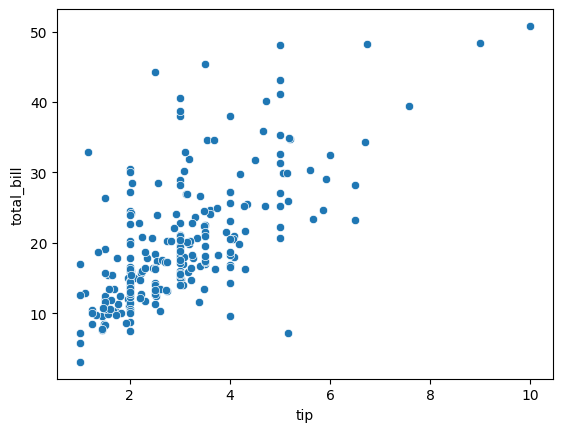

In [2]:
sns.scatterplot(data=tips, x='tip', y='total_bill')

<Axes: xlabel='day', ylabel='count'>

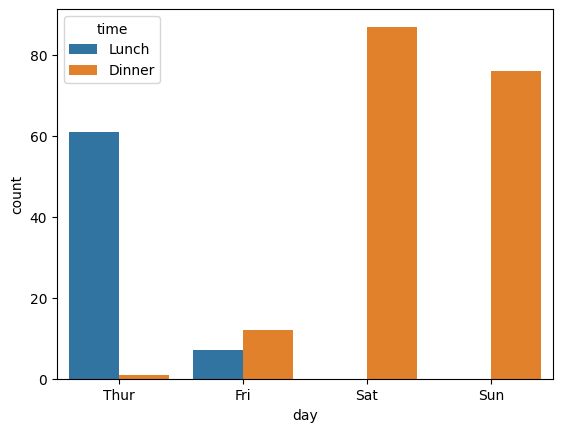

In [3]:
sns.countplot(data=tips, x='day', hue='time')

<Axes: xlabel='day', ylabel='count'>

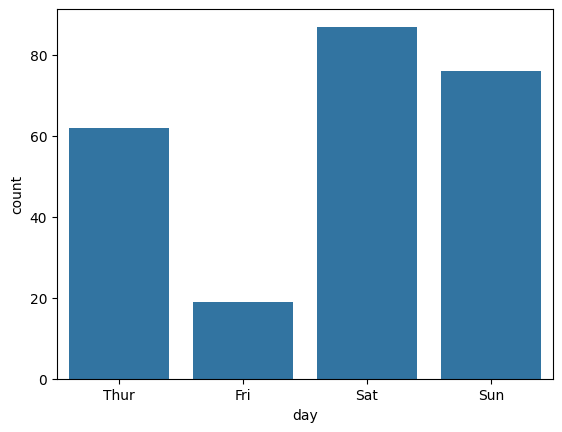

In [4]:
sns.countplot(data=tips, x='day')

<Axes: xlabel='size', ylabel='count'>

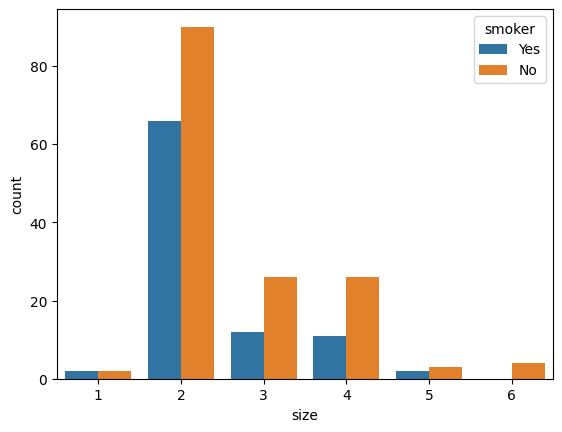

In [5]:
sns.countplot(data=tips, x='size', hue='smoker')

<Axes: xlabel='sex', ylabel='count'>

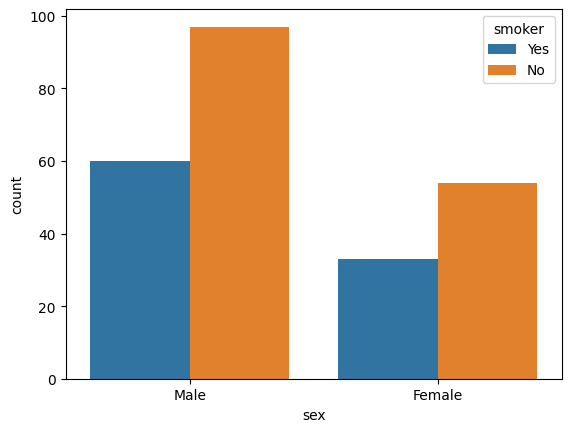

In [6]:
sns.countplot(data=tips, x='sex', hue='smoker')

<Axes: xlabel='time', ylabel='count'>

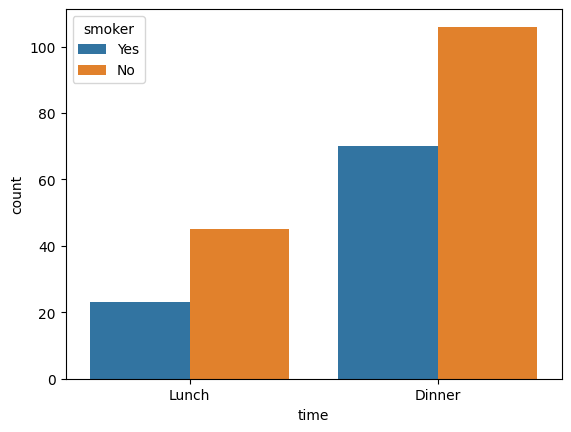

In [7]:
sns.countplot(data=tips, x='time', hue='smoker')

In [8]:
# preprocessing
data = tips[['time', 'size']]

display(data)

,time,size
0,Dinner,2
1,Dinner,3
2,Dinner,3
3,Dinner,2
4,Dinner,4
...,...,...
239,Dinner,3
240,Dinner,2
241,Dinner,2
242,Dinner,2


In [9]:
import pandas as pd

data_preprocessed = pd.get_dummies(data=data['time'])

day_of_week = {
    "Thur" : 0,
    "Fri" : 1,
    "Sat" :2, 
    "Sun" : 3,
}

In [10]:
# Feature Scaling
# Not going to worry about it for this one 

# Cross Validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_preprocessed, tips['day'].map(day_of_week))

# Example from Social Netowk Ads dataset 

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

data = pd.read_csv('Data/Social_Network_Ads.csv')


In [12]:
display(data)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [13]:
data.describe()
# Because they are on such different scales, maybe we want to scale

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [15]:
data.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

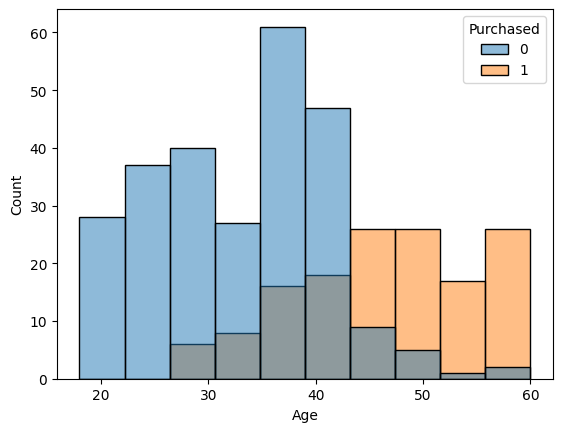

In [16]:
# sns.histplot(data=data, x="Age")
sns.histplot(data=data, x="Age", hue="Purchased")


<Axes: ylabel='Age'>

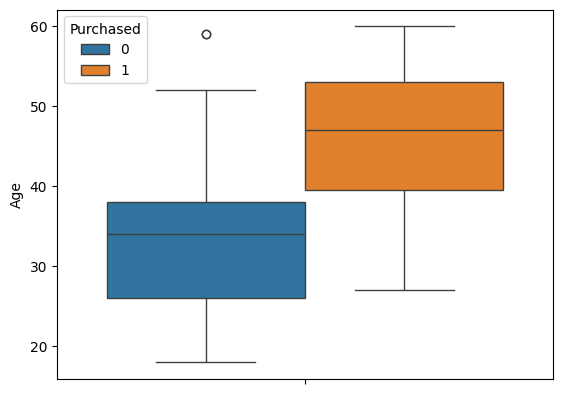

In [17]:
sns.boxplot(data=data, y="Age", hue="Purchased")

<Axes: ylabel='EstimatedSalary'>

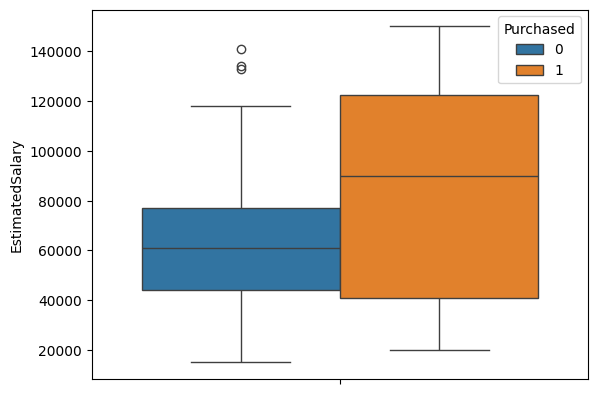

In [18]:
sns.boxplot(data=data, y="EstimatedSalary", hue="Purchased")


In [19]:
# Feature Processing  

# standardize
def standardization(x):
    return ((x - x.mean()) / x.std(ddof=1))

data['Age'] = standardization(data['Age'])

data['EstimatedSalary'] = standardization(data['EstimatedSalary'])

display(data)



,Age,EstimatedSalary,Purchased
0,-1.779569,-1.488183,0
1,-0.253270,-1.458854,0
2,-1.111813,-0.784307,0
3,-1.016419,-0.373714,0
4,-1.779569,0.183521,0
...,...,...,...
395,0.796060,-0.842964,1
396,1.273028,-1.370870,1
397,1.177635,-1.458854,1
398,-0.157877,-1.077589,0


In [20]:
# Cross-Validation 

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(data.drop('Purchased', axis=1).values,
                                                    data['Purchased'].values,
                                                    test_size=0.2, random_state=7)


In [21]:
# Model
from sklearn.naive_bayes import GaussianNB  

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

display(y_pred)


array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [22]:
# Evaluate

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# we predicted that 53 would not purchase the item. 2 of them actually did.
# we predicted htat 24 would purchase it, 3 of them actually did not. 

# precision, recall, all above 90% means that we did a pretty good job.


[[51  3]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.89      0.92      0.91        26

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



# Naive Bayes Object Oriented Programming ways  

- 3 different facilities (R,S,T)

In [23]:
class NaiveBayes():
    def fit(self, X_train, y_train):
        # probability of the label given it's in this label... etc
        print("hello")
        
    def predict(self, X_test):
        # Look up probabilities based on test data
        #return category with highest probability
        print("Hello")
        
        


In [ ]:
facility = ['R', 'S', 'T']
cars_produced = [180, 145, 225]
defective_windshields = [0.05, 0.07, 0.06] # percentage of defective windshields at each facility

import numpy as np
import pandas as pd